# Bus en Alicante

<table align="left">
    <td style="border: 0px">
        <a href="https://colab.research.google.com/github/edu9as/alicante/blob/main/projects/transporte/Bus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir En Colab"/></a>
    </td>
</table>

En este cuaderno, exploraremos el sistema de transporte público en la ciudad de Alicante, centrándonos en el servicio de autobuses. A través de una serie de análisis y visualizaciones, vamos a examinar cómo funciona el servicio de autobuses en la ciudad, cuáles son las rutas más populares, y cómo se distribuyen los tiempos de espera en diferentes momentos del día. Además, vamos a explorar cómo se relaciona el servicio de autobuses con otros aspectos de la vida en la ciudad, como la densidad poblacional y la accesibilidad a lugares de interés. 

Si estás utilizando este notebook desde Google Colab, ejecuta la siguiente celda antes de empezar:

In [ ]:
!git clone https://github.com/edu9as/alicante.git && ln -s /content/alicante/datasets ../../datasets

Comenzamos:

In [4]:
import ast

import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup as bs
from IPython.display import HTML

DATA_DIR = "../../datasets/transporte/bus/"

## Líneas de bus

En esta sección, vamos a explorar las líneas de autobús disponibles en la ciudad de Alicante. En la tabla que se presenta a continuación, se muestran los números y nombres de cada línea de autobús, junto con un enlace a la página web correspondiente para obtener más información sobre los horarios y frecuencias.

In [5]:
lineas = pd.read_csv(DATA_DIR + "lineas.csv")
print(lineas.shape)
lineas.head()

(31, 3)


,number,name,link
0,01,San Gabriel-ciudad Elegida,https://alicante.vectalia.es/linea/linea-01-sa...
1,02,la Florida-sagrada Familia,https://alicante.vectalia.es/linea/linea-02-la...
2,03,Ciudad de Asís-colonia Requena,https://alicante.vectalia.es/linea/linea-03-ci...
3,04,Cementerio-tómbola,https://alicante.vectalia.es/linea/linea-04-ce...
4,05,Rambla-san Agustín,https://alicante.vectalia.es/linea/linea-05-ex...


In [6]:
div = "<ul>"

for i,r in lineas.iterrows():
    div += f'<li><a href="{r.link}">{r.number}</a>: {r["name"]}</li>'

div += "</div>"

display(HTML(div))

## Paradas de bus

En esta sección, vamos a explorar las paradas de autobús disponibles en la ciudad de Alicante. En la tabla que se presenta a continuación, se muestran los códigos y nombres de cada parada de autobús, junto con su latitud y longitud geográficas correspondientes. Con esta información, podremos identificar las paradas más cercanas a nuestros destinos y planificar mejor nuestras rutas en el sistema de transporte público de Alicante. Además, esta información puede ser útil para estudios de movilidad urbana y análisis de datos relacionados con el transporte público en la ciudad.

In [7]:
paradas = pd.read_csv(DATA_DIR + "paradas.csv")
print(paradas.shape)
paradas.head()

(956, 5)


,id,name,code,lon,lat
0,2,3900-SAN GABRIEL-PLAZA BOTELLA,3900,38.328278,-0.511072
1,3,3901-VERGEL,3901,38.330180,-0.509828
2,4,3902-ESCOLANO-PEGO,3902,38.330066,-0.511685
3,5,3903-ESCOLANO-LOS CINCUENTA,3903,38.329606,-0.512913
4,6,3904-DÍAZ DE MENDOZA,3904,38.328100,-0.514978


### Próximo bus

Cada parada de autobús en Alicante tiene un código único que se utiliza para identificarla en el sistema de transporte público. Este código es esencial para poder obtener información actualizada sobre las frecuencias y horarios de los autobuses que pasan por esa parada. Al conocer el código de una parada, podemos utilizar aplicaciones móviles o sitios web para obtener una estimación del tiempo que falta para que llegue el próximo autobús a esa parada, lo que nos permite planificar nuestros desplazamientos de manera más efectiva.

Como ejemplo, vamos a obtener los próximos tiempos en la parada 3938, que es la parada de bus ubicada en la parte sur de la plaza de los Luceros:

In [8]:
paradas[paradas.code == 3938]

,id,name,code,lon,lat
59,63,3938-LUCEROS,3938,38.345678,-0.490819


In [9]:
codigo_parada = "3938"
URL = "http://qr.subus.es/Alicante/consulta.aspx?p={}"

page = requests.get(URL.format(codigo_parada))

soup = bs(page.text, "html.parser")
script = str(soup.find_all("script")[-2])
proximos_buses = [l.strip().strip("\\n+ \"") for l in script.splitlines() if l.strip().strip('"').startswith("Linea")]
print(*proximos_buses, sep = "\n")

Linea 01 SAN GABRIEL: 2 min.
Linea 02 LA FLORIDA: 6 min.


### Paradas de bus en el mapa

Al conocer la ubicación de las paradas, podemos identificar las zonas con mayor densidad de paradas, lo que nos permite planificar nuestras rutas de manera más efectiva y ahorrar tiempo en nuestros desplazamientos. En esta sección, vamos a utilizar la biblioteca de visualización de datos Matplotlib para crear un gráfico en 2D que muestre la ubicación de las paradas de autobús en Alicante. Con este gráfico, podremos identificar las zonas con mayor y menor densidad de paradas, lo que puede ser útil para estudios de movilidad urbana y análisis de datos relacionados con el transporte público en la ciudad.

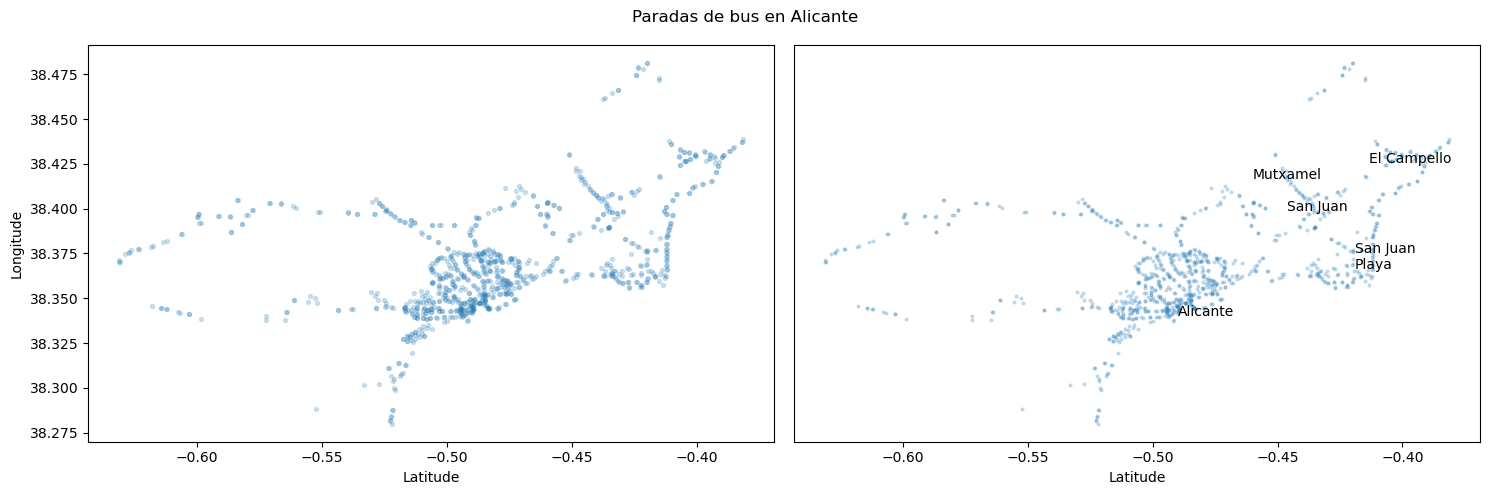

In [10]:
def plot_alicante_bus_stops():
    fig,axs = plt.subplots(1,2, figsize = (15,5))

    paradas.plot.scatter("lat", "lon", alpha = 0.2, s = 8, ax = axs[0])
    paradas.plot.scatter("lat", "lon", alpha = 0.2, s = 4, ax = axs[1])

    axs[0].set_xlabel("Latitude")
    axs[0].set_ylabel("Longitude")
    axs[1].set_xlabel("Latitude")
    axs[1].set_ylabel("")
    axs[1].set_yticks([])

    axs[1].text(-0.490, 38.346, "Alicante", va = "top", ha = "left")
    axs[1].text(-0.419, 38.373, "San Juan\nPlaya", va = "center", ha = "left")
    axs[1].text(-0.434, 38.401, "San Juan", va = "center", ha = "center")
    axs[1].text(-0.446, 38.419, "Mutxamel", va = "center", ha = "center")
    axs[1].text(-0.397, 38.428, "El Campello", va = "center", ha = "center")

    fig.suptitle("Paradas de bus en Alicante")
    fig.tight_layout()

    return fig, axs

plot_alicante_bus_stops()
plt.show()

## Rutas de los buses

En esta sección, vamos a explorar las rutas de autobús disponibles en la ciudad de Alicante. En la tabla que se presenta a continuación, se muestran los códigos y nombres de cada ruta de autobús, así como el tipo de ruta (ida y vuelta) y los identificadores de la línea de autobús y las paradas que forman cada ruta. Con esta información, podremos entender mejor cómo funcionan las rutas de autobús en Alicante y planificar nuestros desplazamientos por la ciudad de manera más efectiva. Además, esta información puede ser útil para estudios de movilidad urbana y análisis de datos relacionados con el transporte público en la ciudad.

In [11]:
rutas = pd.read_csv(DATA_DIR + "rutas.csv")
rutas["stop_ids"] = rutas.stop_ids.apply(ast.literal_eval)
print(rutas.shape)
rutas.head()

(216, 8)


,id,code,name,journey,line_id,stop_ids,kmls,kml_color
0,110,13N-ida,13N Ida,outward,59066.0,"[272, 677, 28, 29, 180, 181, 362, 363, 364, 36...",0,#55ff00
1,111,13N-vuelta,13N Vuelta,return,59066.0,"[684, 685, 686, 687, 688, 440, 441, 349, 1145,...",0,#55ff00
2,642,01-idaM,01 Ida,outward,59098.0,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",0,#ed0700
3,641,01-vueltaM,01 Vuelta,return,59098.0,"[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 5...",0,#00ffff
4,643,02-idaM,02 Ida,outward,59099.0,"[85, 86, 87, 88, 89, 90, 16, 17, 18, 19, 20, 2...",0,#ff0000


Algunos ejemplos de rutas de buses son:

- 01: conecta el sur (barrio de San Gabriel) con el norte de la ciudad de Alicante (Ciudad Elegida).
- 21: conecta el centro de la ciudad de Alicante con El Campello, pasando por San Juan Playa.
- 23: conecta el centro de la ciudad de Alicante con Mutxamel, pasando por San Juan.

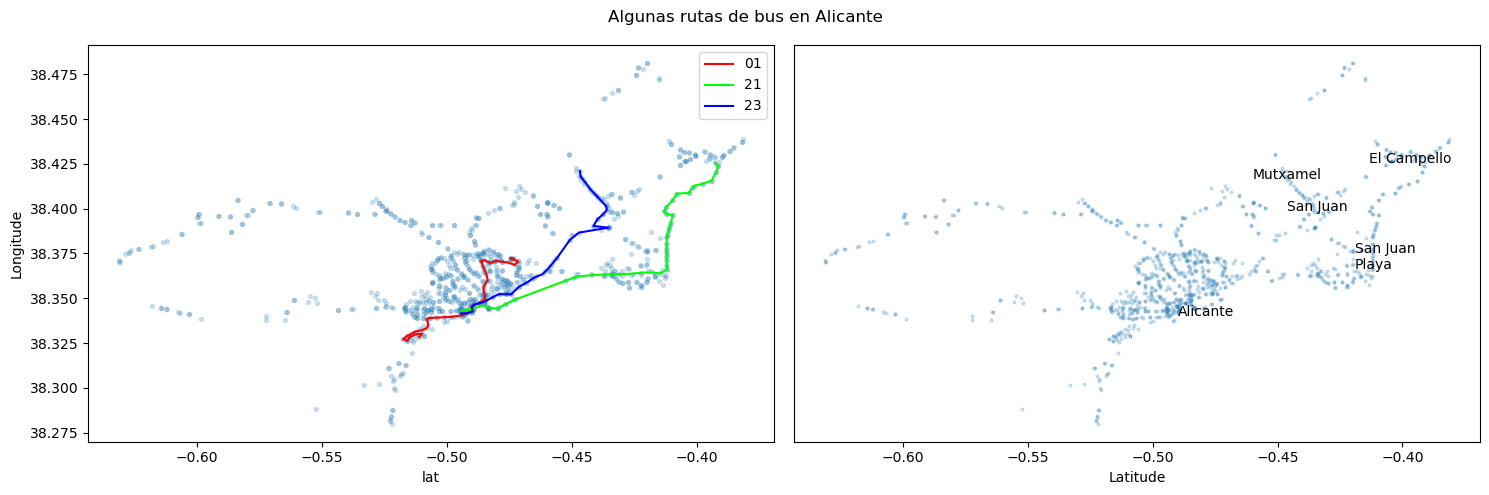

In [12]:

algunas_rutas = {
    "01": "#f00",
    "21": "#0f0",
    "23": "#00f",
}

fig, axs = plot_alicante_bus_stops()

allowed_routes = [line_id + " Ida" for line_id in algunas_rutas]

for i,r in rutas.iterrows():
    if r["name"] not in allowed_routes: continue

    line_code = r["name"].split()[0]
    color = algunas_rutas[line_code]

    ids = [sid for sid in r.stop_ids if (sid) in paradas.id]
    
    stops = paradas.set_index("id").loc[ids]

    stops.plot("lat", "lon", color = color, ax = axs[0], label = line_code)
    if r["name"] == "23 Ida": break
    

fig.suptitle("Algunas rutas de bus en Alicante")
fig.tight_layout()

plt.show()

## Conclusión

Este notebook nos ha permitido explorar algunos de los conjuntos de datos más relevantes relacionados con el transporte en autobús en Alicante. Hemos descubierto información importante sobre las líneas y paradas de autobús disponibles en la ciudad, así como sobre las rutas que se pueden tomar para llegar a diferentes destinos. Estos datos pueden ser de gran utilidad para planificar rutas, reducir tiempos de espera y mejorar la eficiencia del transporte público en la ciudad.

Además, es importante destacar que todos los datos utilizados en este notebook están disponibles de forma abierta y libre, lo que significa que cualquier persona puede acceder a ellos, utilizarlos y compartirlos con otros. Esta filosofía de "open data" y "open source" es fundamental para el avance de la ciencia de datos y la inteligencia artificial, y permite que la comunidad pueda aprovechar al máximo las herramientas disponibles para resolver problemas en una variedad de campos.

Por lo tanto, esperamos que este notebook haya sido útil para quienes estén interesados en aprender más sobre el transporte en autobús en Alicante y sobre el potencial que estos datos tienen para mejorar la movilidad urbana. Además, invitamos a todos los usuarios a contribuir con sus ideas y conocimientos para seguir mejorando y enriqueciendo este repositorio en el futuro.